# **Python Introduction Course**
Created by Daniel Postica and Mirko Schömig

[Chair of Production and Supply Chain Management](https://www.ot.mgt.tum.de/scm/home/) (Grunow)

School of Management, Technical University of Munich

# **Lecture 3: Introduction to Gurobi**
**Contents:**

1. Installation
2. Simple Gurobi Example
3. Data Preparation and Further Gurobi Examples in PyCharm

# **1. Installation**

* Download Python at: https://www.python.org/downloads/
* Download PyCharm at: https://www.jetbrains.com/pycharm/download (Scroll down for community edition)
* Create an account at: https://www.gurobi.com
* After creating the account go to: https://www.gurobi.com/academia/academic-program-and-licenses/ and select Academic Named-User License.
* On the next page the installation instructions are displayed.

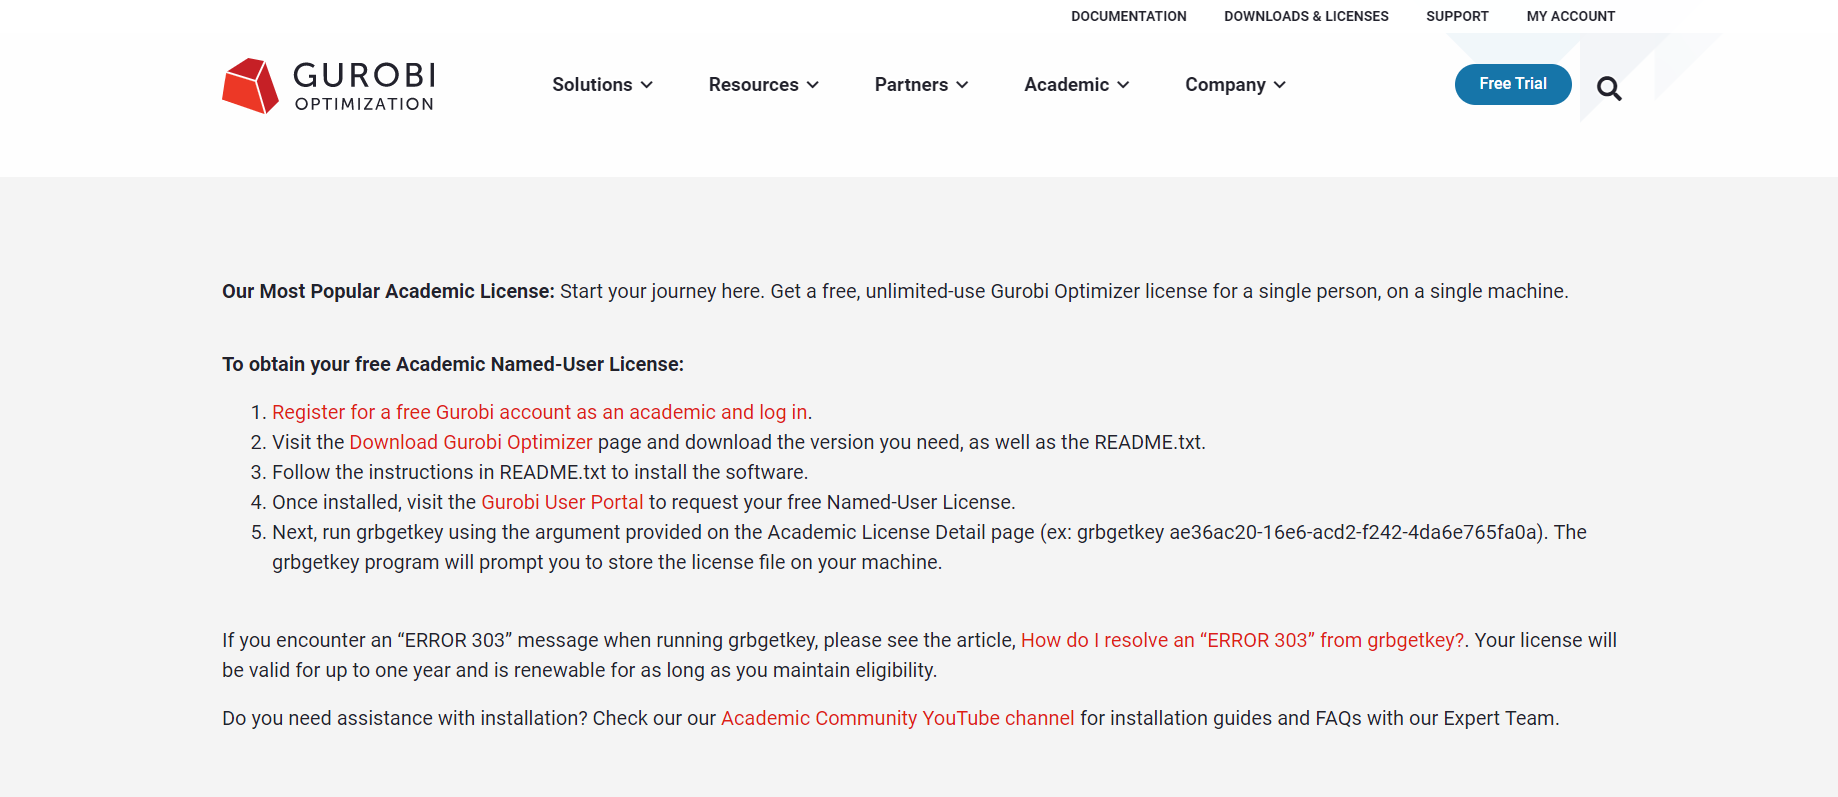

# **2. Simple Gurobi Examples**

In [2]:
# Install the Gurobi package
!pip install gurobipy 



# Import the package
from gurobipy import *




* The gurobipy package contains objects named Model that embed the objective function, constraints and variables.
* The usual workflow for creating a model in Gurobi can looks as follows:
> 1. Pre-process the data.
  2. Create the model object.
  3. Create the variables and add them to the model.
  4. Create the constraints and add them to the model.
  5. Create the objective function and add it to the model.
  6. Optimize the model.
  7. Output the results in the desired form.

* Let us solve a small instance of a linear program (LP). First, we create a model. It can be done using the **gurobipy.Model()** fucntion.

* **Model:**
> ***maximize*** *x + 2y + 3z* <br>
  ***subject to:*** <br>
  *-x + y + z <= 20* <br>
  *x - 3y + z <= 30* <br>
  *x <= 40* <br>
  *x >= 0* <br>
  *y >= 0* <br>
  *z >= 0*







In [3]:
# Create an instance of the model object and save it in a variable
toy_modal = Model("Model_1")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-17


* In the next step we add the decision variables. Single variables can be added using the **model_Name.addVar()** function. It takes as arguments the name of the variable, its type and its lower and upper bounds.

In [4]:
# Create the 3 decision variables and add them to the model
x = toy_modal.addVar(name="x", vtype=GRB.CONTINUOUS, lb=0, ub=40)
y = toy_modal.addVar(name="y", vtype=GRB.CONTINUOUS, lb=0)
z = toy_modal.addVar(name="z", vtype=GRB.CONTINUOUS, lb=0)



* Now we can add the constraints. Single constraints can be added using the **model_Name.addConstr()** function that takes an expression and the cosntraint name as arguments.

In [6]:
# Add the constraints
c_1 = toy_modal.addConstr(-x + y + z <= 20, name="constraint 1")
c_2 = toy_modal.addConstr(x - 3*y + z <= 30, name="constraint 2")

* Next, the objective function is defined using the **model.setObjective()** function. This time an expression and objective (minimize/maximize) are passed as arguments.

In [7]:
obj_function = x + 2*y + 3*z
obj =  toy_modal.setObjective(obj_function, sense=GRB.MAXIMIZE)

* After adding decision variables, constraints and objective function, we can solve the model.

In [8]:
# Optimize the model
toy_modal.optimize()



Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M3 Pro
Thread count: 11 physical cores, 11 logical processors, using up to 11 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x9ebf52d1
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [4e+01, 4e+01]
  RHS range        [2e+01, 3e+01]
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4000000e+31   1.500000e+30   1.400000e+01      0s
       2    2.0250000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.025000000e+02


* Now, we can output the result in a formated way.

In [16]:
# Introduce a new way to print strings + variables
# Print the objective function value
print(f"The objective function value is: {toy_modal.ObjVal}")


print()

# Print the values of the decision variables
for variable in toy_modal.getVars():
    print(f"{variable.varName} : {variable.x}")




The objective function value is: 202.5

x : 40.0
y : 17.5
z : 42.5
